### Make a Garnet Zoning Profile with right and left Y-Axis
This is an example to plot a garnet zonation profile with a left and right scaleable axis from a data file. The python script uses matplotlib.pyplot and the csv module. The diagram is easy to customize. After running the program stores the diagram to pdf.

[Download Python Code](garnetprofile.py)  
[Download Garnet Data File](garnet.txt)

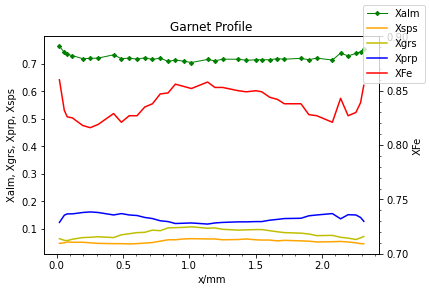

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import csv

x=[]
xalm=[]
xgrs=[]
xprp=[]
xsps=[]
xFe=[]

with open('garnet.txt','r') as csvfile:
        # read the tab-delimited data file
          plots=csv.reader(csvfile, delimiter='\t')
        # skip the header line (first line in data file)
          next(plots)
          for row in plots:
              x.append(float(row[6]))
              xFe.append(float(row[1]))
              xalm.append(float(row[2]))
              xgrs.append(float(row[3]))
              xprp.append(float(row[4]))
              xsps.append(float(row[5]))

fig, ax1 = plt.subplots()
ax1.set_xlabel('x/mm')
ax1.set_ylabel('Xalm, Xgrs, Xprp, Xsps')
ax1.plot(x,xalm, marker='D', markersize=3, linewidth=1, color='green', label='Xalm')
ax1.plot(x,xsps, color='orange', label='Xsps')
ax1.plot(x,xgrs, color='y', label='Xgrs')
ax1.plot(x,xprp, color='blue', label='Xprp')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'red'
ax2.set_ylabel('XFe')
y2start=0.7
y2end=0.9
ax2.set_ylim([y2start, y2end])
ax2.yaxis.set_ticks(np.arange(y2start, y2end, .05))

ax2.minorticks_on()
ax2.plot(x,xFe, color=color, label='XFe')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#ax1.legend(lines + lines2, labels + labels2, loc=0)
# Place legend outside of diagram
fig.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Garnet Profile')
plt.savefig('profile.pdf')
plt.show()